## CROP RECOMMENDATION MODEL 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset 1 Fertilizer_Data

In [2]:
fertilizer = pd.read_csv("dataset/Fertilizer_Prediction.csv" )

In [3]:
fertilizer

Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer Name  
0           0            0            Urea  
1           0           36             DAP  
2           9           30        14-35-14  
3           0           20           28-28  
4           0            0            Urea  
..        ...          ...             ...  
94          0           19           28-28  
95         17           17        10-26-26  
96          0            0            Urea  
97          0           41             DAP  
98          0           10           20-20  

[99 rows x 9 columns]

In [4]:
fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [5]:
fertilizer.shape

(99, 9)

In [6]:
# checking missing values 
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [7]:
fertilizer.Moisture.shape

(99,)

### Dataset-2 CROP DATA

In [8]:
crop = pd.read_csv("dataset/Crop_recommendation.csv")

In [9]:
crop

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [10]:
crop.shape

(2200, 8)

In [11]:

# change the columns 
crop.columns=['nitrogen','phosphorous','potassium', 'temperature', 'humidity ','ph', 'rainfall','label']

In [12]:
crop.head()

nitrogen  phosphorous  potassium  temperature  humidity         ph  \
0        90           42         43    20.879744  82.002744  6.502985   
1        85           58         41    21.770462  80.319644  7.038096   
2        60           55         44    23.004459  82.320763  7.840207   
3        74           35         40    26.491096  80.158363  6.980401   
4        78           42         42    20.130175  81.604873  7.628473   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice

## Creating Reports of The Data 

In [39]:
from ydata_profiling import ProfileReport

In [40]:
crop_report = ProfileReport(crop)

In [41]:

crop_report.to_file(output_file='crop_Data_Profiling_Report.html')
crop_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
fertilizer_report  = ProfileReport(fertilizer)

In [43]:

fertilizer_report.to_file(output_file='Fertilizer_Data_Profiling_Report.html')

fertilizer_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA

In [46]:
crop.describe()

nitrogen  phosphorous    potassium  temperature    humidity   \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [47]:
fertilizer.describe()

Temparature  Humidity    Moisture   Nitrogen  Potassium  Phosphorous
count    99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean     30.282828  59.151515  43.181818  18.909091   3.383838    18.606061
std       3.502304   5.840331  11.271568  11.599693   5.814667    13.476978
min      25.000000  50.000000  25.000000   4.000000   0.000000     0.000000
25%      28.000000  54.000000  34.000000  10.000000   0.000000     9.000000
50%      30.000000  60.000000  41.000000  13.000000   0.000000    19.000000
75%      33.000000  64.000000  50.500000  24.000000   7.500000    30.000000
max      38.000000  72.000000  65.000000  42.000000  19.000000    42.000000

In [13]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorous  2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [15]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [16]:
fertilizer["Fertilizer Name"].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

## *Data Visualization* 

In [32]:
numerical_features_crop  = crop.select_dtypes(include=np.number).columns.tolist()
numerical_features_crop

['nitrogen',
 'phosphorous',
 'potassium',
 'temperature',
 'humidity ',
 'ph',
 'rainfall']

Flatten here does :
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: >]


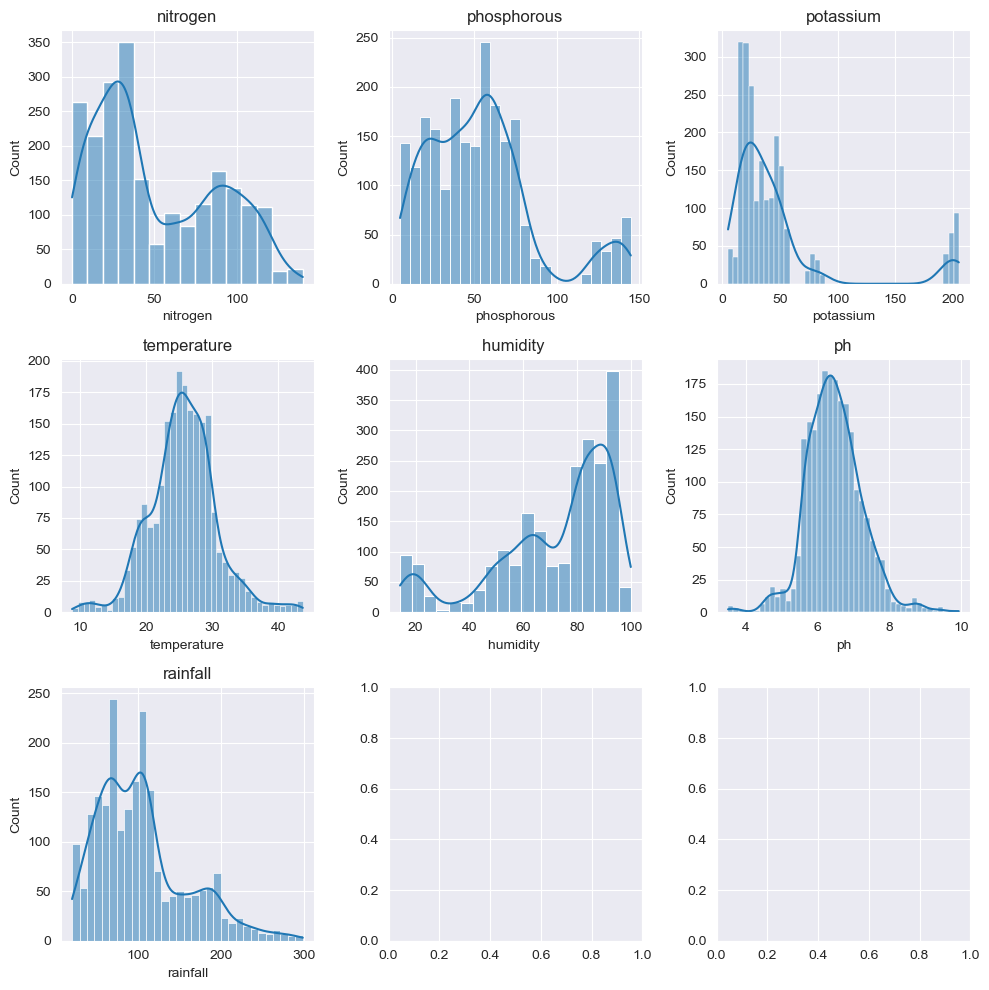

In [33]:
# plotting the histograms 
fig,ax = plt.subplots(3,3 ,figsize =(10,10))
print("Flatten here does :\n", ax.flatten())
for i,subplot in zip(numerical_features_crop,ax.flatten()):
    sns.histplot(data=crop[i],ax=subplot,kde=True)
    subplot.set_title(i)
plt.tight_layout(
)
plt.show()

In [19]:
crop[("label")]

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [28]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.
 |  
 |     >>> list(zip('abcdefg', range(3), range(4)))
 |     [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]
 |  
 |  The zip object yields n-length tuples, where n is the number of iterables
 |  passed as positional arguments to zip().  The i-th element in every tuple
 |  comes from the i-th iterable argument to zip().  This continues until the
 |  shortest argument is exhausted.
 |  
 |  If strict is true and one of the arguments is exhausted before the others,
 |  raise a ValueError.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  

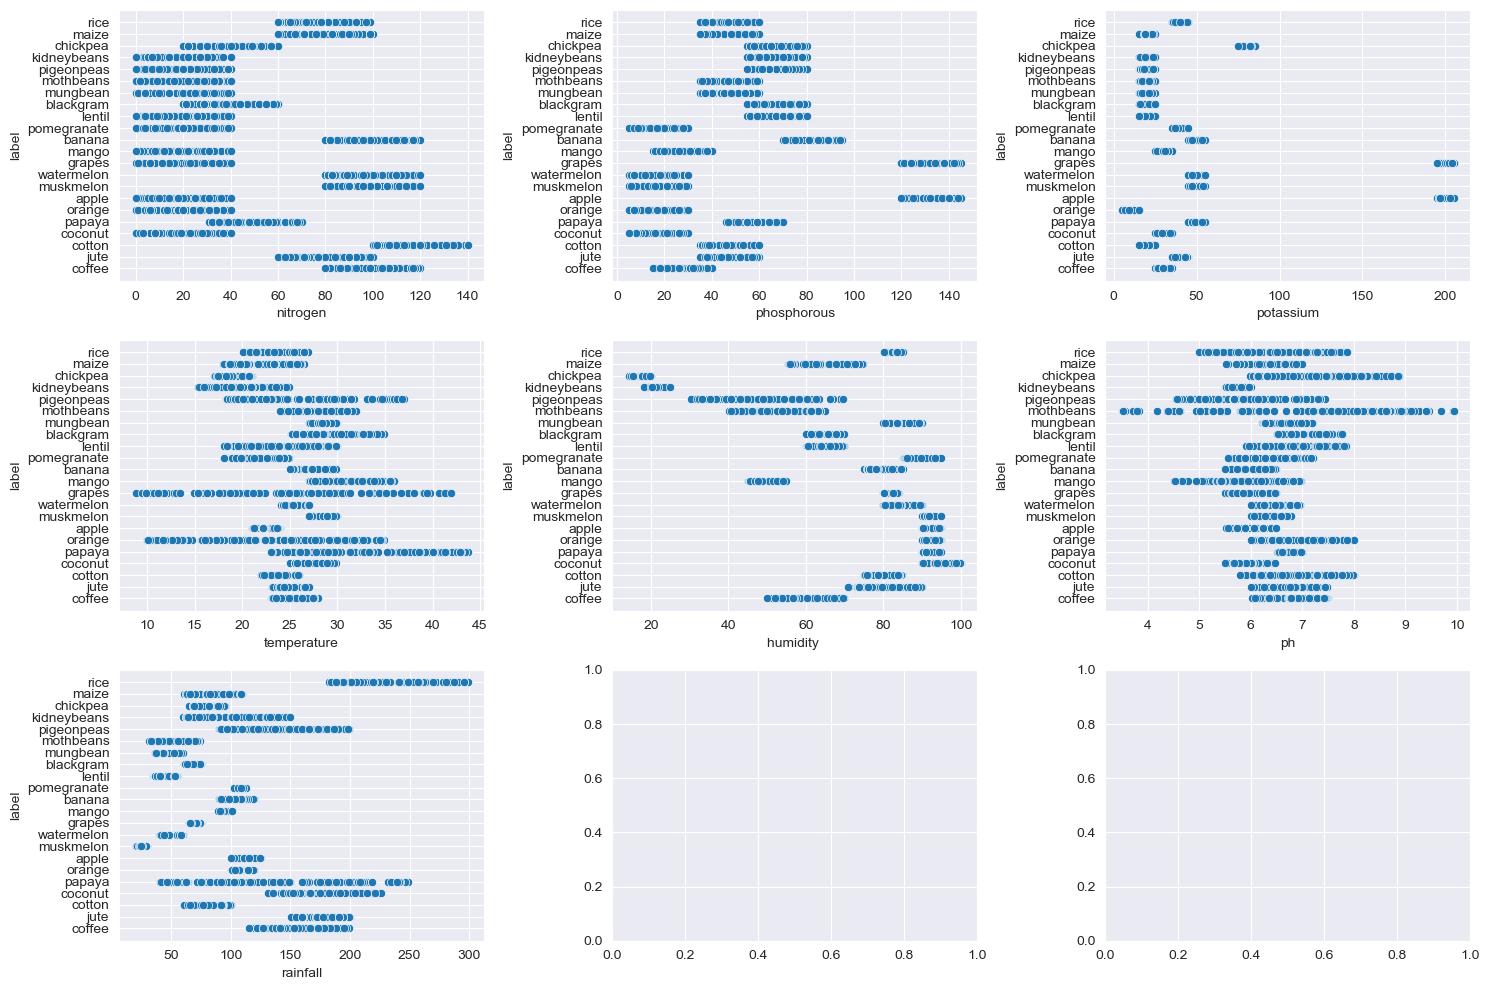

In [37]:
# Plotting scatter Plot 
fig ,ax = plt.subplots(3,3,figsize=(15,10))
for i,subplot in zip(numerical_features_crop,ax.flatten()):
    sns.scatterplot(data=crop,x=i,y="label",ax=subplot)
plt.tight_layout()
plt.show()

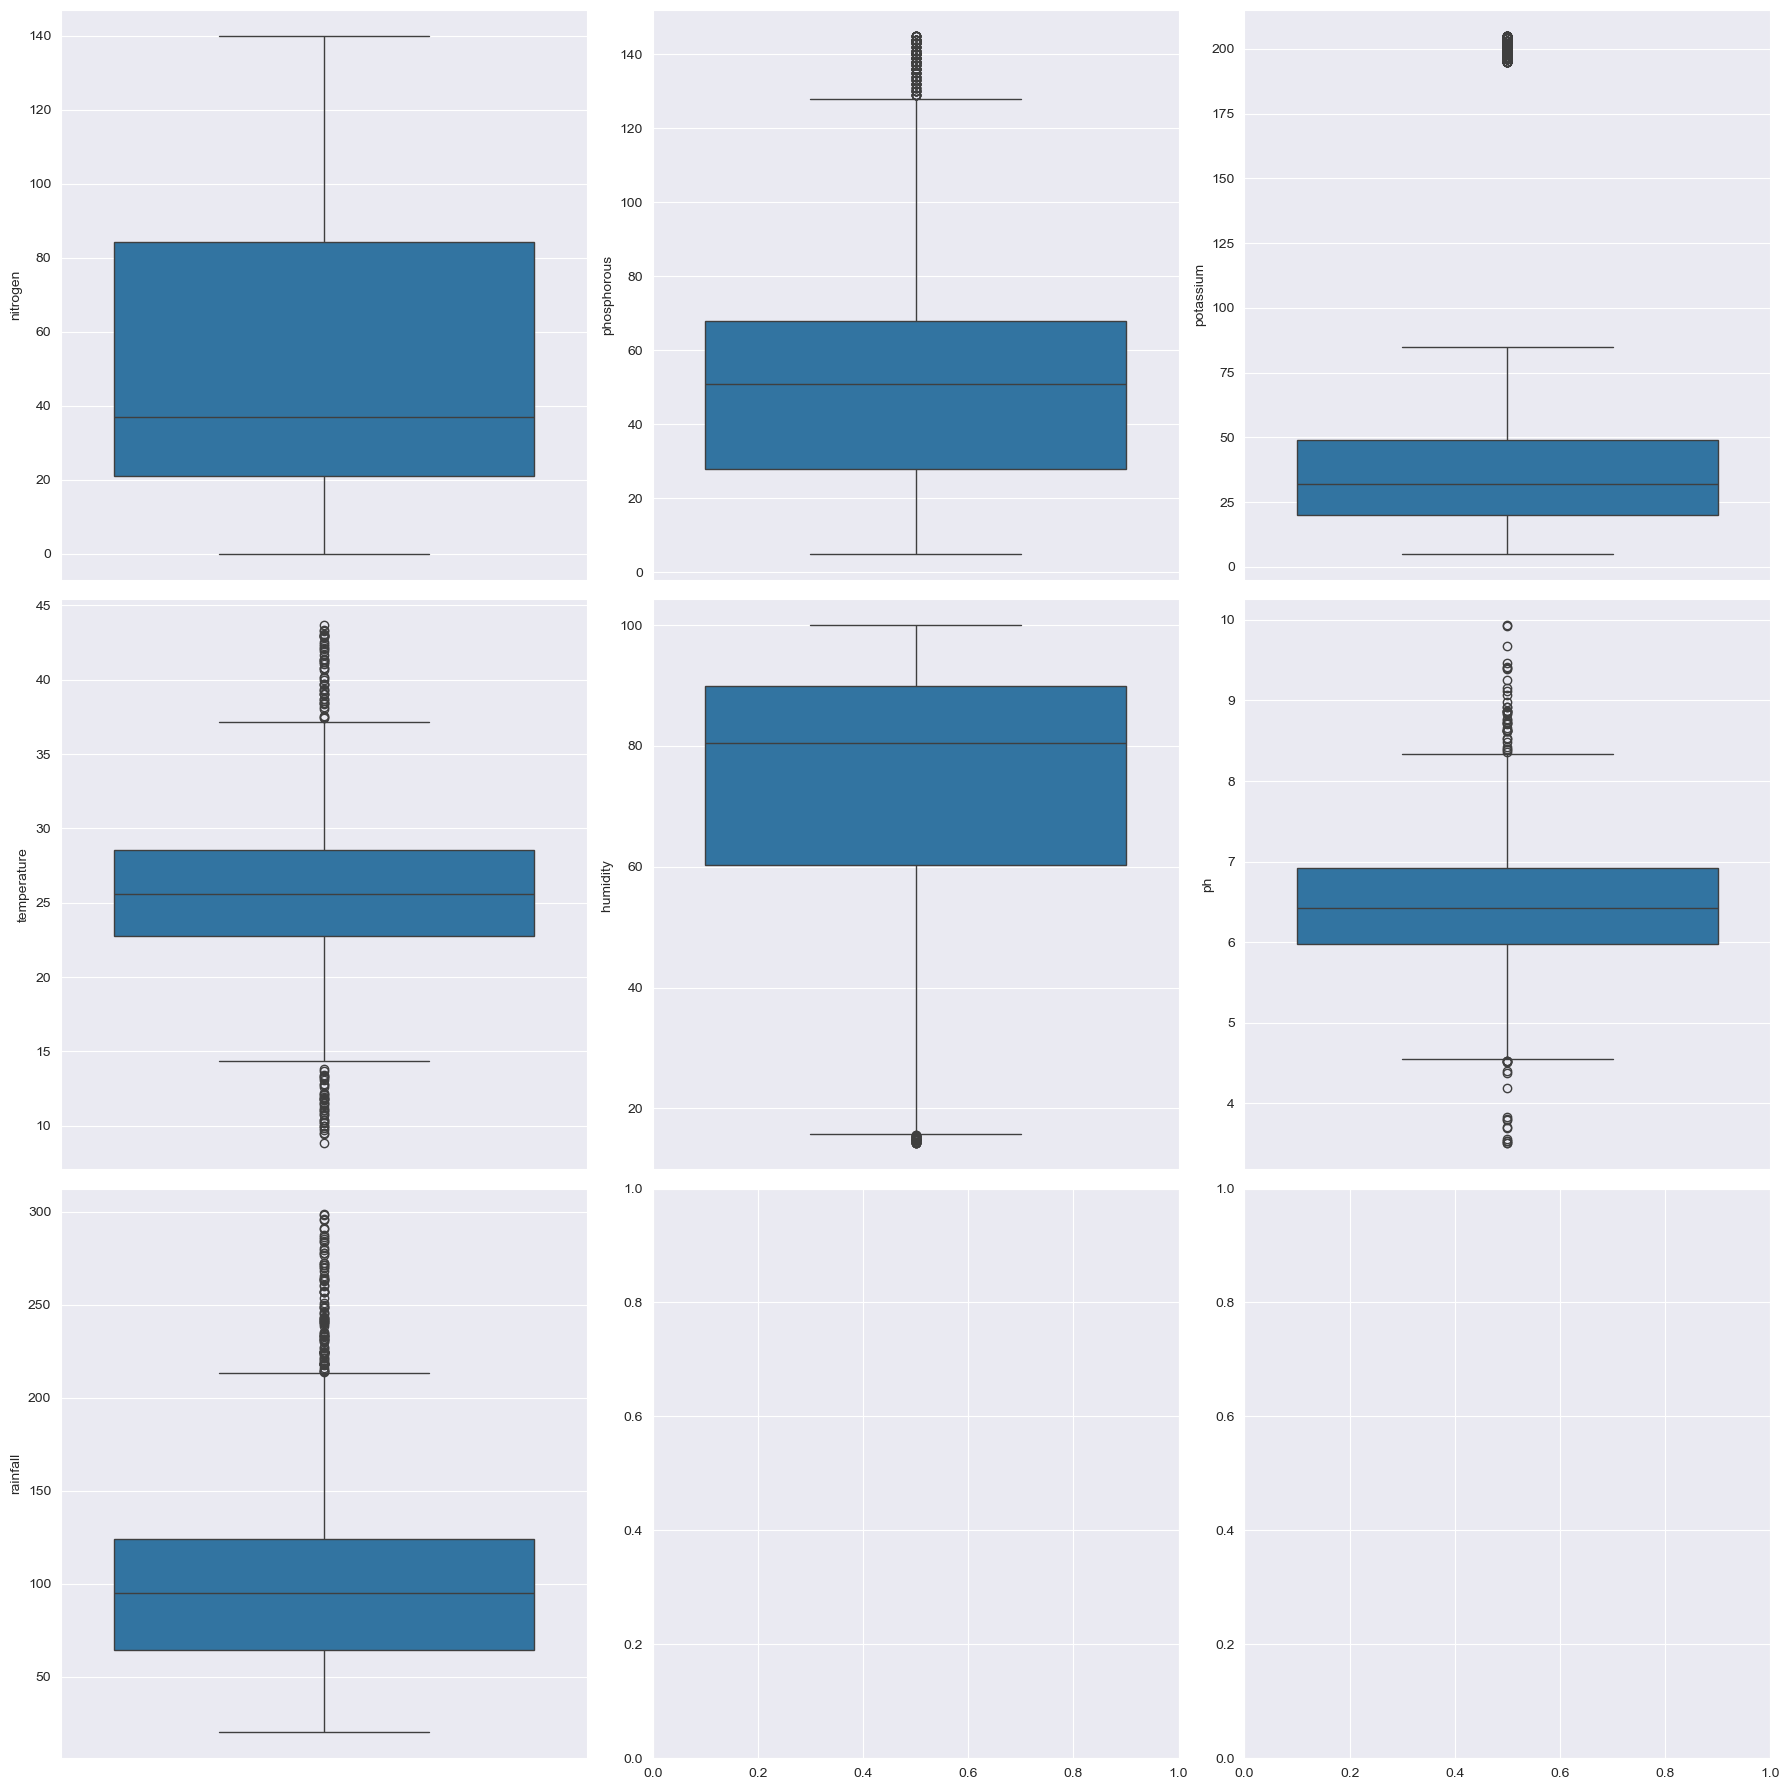

In [41]:
# Finding Outliers through boxplot
fig,ax = plt.subplots(3,3,figsize = (18,18))
for i ,subplot in zip(numerical_features_crop,ax.flatten()):
    sns.boxplot(data=crop[i],ax=subplot)
plt.tight_layout(
)
plt.show()

In [42]:
# Correlation of the features
num_cols_crop = crop.select_dtypes(include=np.number)
num_cols_crop.corr()

nitrogen  phosphorous  potassium  temperature  humidity   \
nitrogen     1.000000    -0.231460  -0.140512     0.026504   0.190688   
phosphorous -0.231460     1.000000   0.736232    -0.127541  -0.118734   
potassium   -0.140512     0.736232   1.000000    -0.160387   0.190859   
temperature  0.026504    -0.127541  -0.160387     1.000000   0.205320   
humidity     0.190688    -0.118734   0.190859     0.205320   1.000000   
ph           0.096683    -0.138019  -0.169503    -0.017795  -0.008483   
rainfall     0.059020    -0.063839  -0.053461    -0.030084   0.094423   

                   ph  rainfall  
nitrogen     0.096683  0.059020  
phosphorous -0.138019 -0.063839  
potassium   -0.169503 -0.053461  
temperature -0.017795 -0.030084  
humidity    -0.008483  0.094423  
ph           1.000000 -0.109069  
rainfall    -0.109069  1.000000

<Axes: >

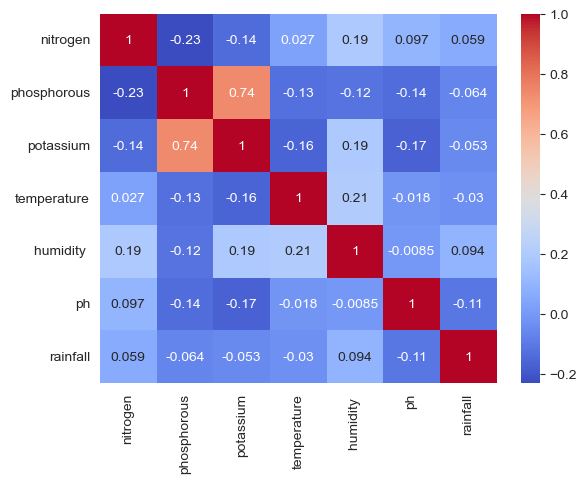

In [54]:
# Visualizing with HeatMap
corr= num_cols_crop.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")